Crear imagen de los dipolos electricos y ver lineas de campo de las mismas

Lo primero que vamos a hacer es enteder las herramientas que vamos a ocupar para crear este codigo:
lo primero son los paquete estos paquetes son modulos o herramientas que podemos usar, estas herramientas nos sirven para resolver diferentes cosas pueden ser herramientas para animar, para calculos matematicos, para poder exportar archivos e infinidad de cosas mas.

Ahora los paquetes que vamos a ocupar son Numpy y Matplotlib, estos paquetes nos sirven para poder usar funciones matematicas y para poder graficar datos

las funciones que vamos a ocupar de cada una son

## **Numpy**

### array:
    - es una funcion que se encarga de poner transformar una lista en un arreglo de numpy el cual se comporta como una matriz y asi pode organizar y aplicar operaciones conjuntas. 

In [13]:
import numpy as np

a=np.array([[0,3,4,5],[1,2,3,4]])
print("arreglo 3x2")
print(a)
b=np.array([5,3])
print("arreglo 2x1")
print(b)
print("Operaciones de matrices axb")
print(b@a)

arreglo 3x2
[[0 3 4 5]
 [1 2 3 4]]
arreglo 2x1
[5 3]
Operaciones de matrices axb
[ 3 21 29 37]


### Linspace

- nos permite crear una cantidad determinada de numeros entre una rango que lo demarcamos.

In [34]:
a=np.linspace(1,2,10)
print("10 objetos entre 1 y 2 igualmente espaciados")
print(a)
print("_____________")
print("por defecto la cantidad de numeros que linspace crea es 50")
b=np.linspace(1,50)
print(b)

10 objetos entre 1 y 2 igualmente espaciados
[1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]
_____________
por defecto la cantidad de numeros que linspace crea es 50
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


## Meshgrid

- es una manera de crear un par de datos que se referencien entre si, de manera que cada uno de los puntos que se encuentren en x se dibujen o relacionen con los puntos en y. (me falta mas información porque no entiendo tanto como funciona)

[0. 1.] [0.  0.5 1. ]
[[0. 1.]
 [0. 1.]
 [0. 1.]]
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


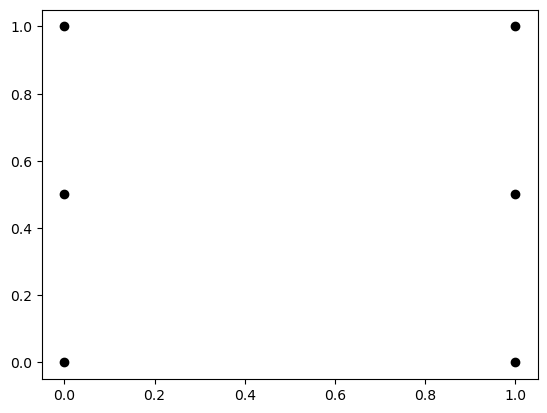

In [41]:
nx, ny = (2, 3)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print(x,y)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

# Escribiendo el codigo

A continuacion tenemos un codigo de ChatGTP que nos permite tener un primer paso de como empezar este trabajo, desafortunadamente o afortunadamente el codigo no funciona para observar las lineas del campo, pero estudiemoslo para ver porque no lo hace, que es lo que hace y si se puede arreglar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field_due_to_point_charge(q, r0, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    # Evitar la singularidad en r=0
    if r < 1e-10:
        return np.array([0.0, 0.0])
    else:
        return k * q * (np.array([x, y]) - np.array(r0)) / r**3

def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Posición de las cargas
    r_positive = np.array([d/2, 0])
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q, r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q, r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative

# Definir el rango de valores para x y y
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole(1, 1, X, Y)

# Graficar las líneas de campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=2, linewidth=1, arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Líneas de campo eléctrico de un dipolo eléctrico')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Lo primero que vamos a hacer es explicar parte por parte y ver si la cadena logica usada esta bien y arreglar los errores que encontramos en el camino. Lo primero que notamos es que usa los paquetes matplotlib y numpy, lo cual suele ser lo mas comun para este tipo de trabajos.

Seguido de esto define dos funciones la cual en teoria deberia servir para calcular el campo electrico de una particula puntual y la siguiente funcion nos permite calcular el campo electrico del dipolo. Entonces lo primero que vamos a ver es si estas funciones compilan y despues si funcionan.

In [49]:
def electric_field_due_to_point_charge(q, r0, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    # Evitar la singularidad en r=0
    if r < 1e-10:
        return np.array([0.0, 0.0])
    else:
        return k * q * (np.array([x, y]) - np.array(r0)) / r**3
    
print(electric_field_due_to_point_charge(10,[2,0],0,0))

[-2.24688795e+10  0.00000000e+00]


el codigo compila exitosamente, ahora entedamos poco a poco que es lo que esta haciendo, la funcion tiene como objetivo calcular el campo en cada punto que nosotros le ingresemos.

Para ello le ingresamos el valor de nuestra carga "q", la posicion de nuestra carga "r0" y las dos coordenadas del punto donde queremos saber el campo "x" e "y".

luego de esto en nuestra funcion vamos a ingresar la constante de coulomb "k" la cual nos va a permintir realizar nuestros calculos mas adelante.

Continuamos definiendo la distancia entre nuestro carga con respecto a la carga de prueba a traves de la variable "r", para ello dado que estamos trabajando con vectores debido a las dos cordenadas "x" e "y"(ojala proximamente "z") calculamos a traves del teorema de pitagoras.

Adicionalmente debemos entender que debido a como la formula de campo electrico (1) se encuentra definida debemos tomar en cuenta que existe una singularidad en 0, por lo que para evitarlo tenemos un condicional para una distancia menor $1*10^{-10}$
$$
\vec{E}=k*\frac{q*(r_2-r_1)}{r^3} \tag{1}
$$

Entonces en la teoria y la practica pareciera que esta funcionando el código.

In [43]:
def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Posición de las cargas
    r_positive = np.array([d/2, 0])
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q, r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q, r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative


Ahora lo que tenemos aqui son 